- Examine distribution of noise samples

- View coverage on map

- Decide on bounding box for samples to use.
(Some samples were way out in the middle of nowhere.)

In [38]:
# NoiseTube EDA
import pandas as pd
import seaborn as sns
import folium
from folium import plugins

In [3]:
noise = pd.read_csv('/Users/Ben/Dropbox/Insight/noisetube-scrape/noise-tube-clean.csv')
len(noise)

749

In [4]:
print(
    noise.city.value_counts()
)

boston         503
summerville    163
cambridge       80
brookline        2
chelsea          1
Name: city, dtype: int64


In [5]:
noise.head()

,Unnamed: 0,lat,lng,minute,hour,loudness,city
0,0,41.968175,-71.702159,28.066667,0,56.280044,boston
1,1,42.262843,-71.025653,48.000000,5,27.171375,boston
2,2,42.262839,-71.025658,56.463415,5,27.001976,boston
3,3,42.262839,-71.025658,21.438596,6,23.892579,boston
4,4,42.262839,-71.025658,23.000000,6,21.001500,boston


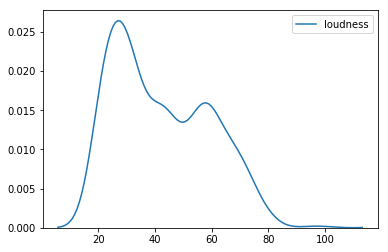

In [6]:
sns.kdeplot(noise.loudness)

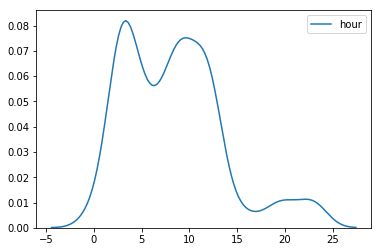

In [7]:
sns.kdeplot(noise.hour)

In [25]:
noise.hour.value_counts().sort_index()

0      13
1       3
2      33
3     148
4      36
5      34
6      41
7      33
8      33
9     109
10     31
11     29
12    116
13     16
14      3
15      6
16      7
17      1
18      1
19     13
20     12
21      5
22      1
23     25
Name: hour, dtype: int64

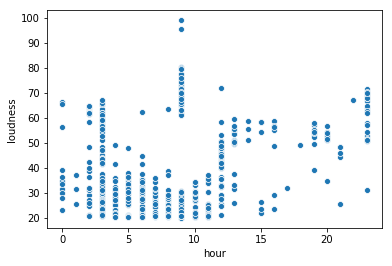

In [15]:
sns.scatterplot(
    y = 'loudness',
    x = 'hour',
    data = noise
)

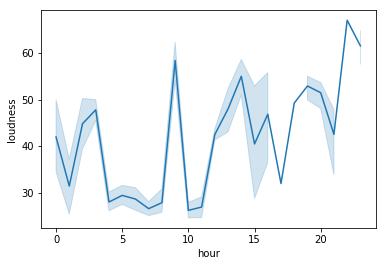

In [16]:
sns.lineplot(
    y = 'loudness', 
    x = 'hour',
    data = noise
)

In [77]:
nmap = folium.Map(
    location = [42.3601, -71.0589]
#     tiles = 'Stamen Toner'
)
for lat, lng, loudness in zip(noise.lat, noise.lng, noise.loudness):
    folium.CircleMarker(
        location = [lat, lng],
        fill_color = loudness,
        color = 'black',
        radius = 4,
        weight = 1
    ).add_to(nmap)

# defining a bounding box to drop observations
# that are too remote
folium.vector_layers.Rectangle(
    bounds = [[42.323, -71.14], [42.41, -71.018]]
).add_to(nmap)

nmap